In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy.integrate import quad

# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [16]:
#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,n=100):
     """
     in:
     a,b - float, limits of x, N - int, number of grid points
     A,B - float, boundary values
     alpha, beta - array of float, coefficients for boundary conditions in general case (deriv coeff, func coeff)
     p(x), g(x), f(x) - functions from general equation

     you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)

     out: 
     y - array of float, solution of the BVP
     """
     grid = np.linspace(a, b, n)[1:-1]
     #p_grid = p(grid)*np.ones_like(grid)
     #q_grid = q(grid)*np.ones_like(grid)
     #f_grid = f(grid)*np.ones_like(grid)
     h = abs(grid[0]-grid[1])
     ak = 1.-h*p(grid)*np.ones_like(grid)/2     #p_grid/2.
     bk = (h**2)*q(grid)*np.ones_like(grid)-2   #q_grid-2.
     ck = 1. + h*p(grid)*np.ones_like(grid)/2     #p_grid/2.
     b0 = h*(-alpha[0]+alpha[1]*h)   #одностороннее приближение, тк лучше ничего не придума
     c0 = h*alpha[0]
     an = -h*beta[0]
     bn = h*(beta[0]+beta[1]*h)
     rhs = f(grid)*np.ones_like(grid)*h**2
     rhs = np.insert(rhs, 0, A*h**2)
     rhs = np.append(rhs, B*h**2)
     ak = np.append(ak, an)
     bk = np.insert(bk, 0, b0)
     bk = np.append(bk, bn)
     ck = np.insert(ck, 0, c0)
     lhs = np.diag(bk)
     lhs[np.arange(ck.shape[0]),np.arange(ck.shape[0])+1] = ck
     lhs[np.arange(ck.shape[0])+1,np.arange(ck.shape[0])] = ak
     y = solve(lhs, rhs)
     if np.max(abs(p(grid)*np.ones_like(grid)*h))>=2.:
          print("Неустойчивая")
     return y


In [26]:
#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,n=100):
      """
      in:
      a,b - float, limits of x, N - int, number of grid points
      A,B - float, boundary values
      alpha, beta - array of float, coefficients for boundary conditions in general case (deriv coeff, func coeff)
      p(x), g(x), f(x) - functions from general equation

      you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)

      out: 
      y - array of float, solution of the BVP
      """
      grid = np.linspace(a, b, n)[1:-1]
      #p_grid = p(grid)*np.ones_like(grid)
      #q_grid = q(grid)*np.ones_like(grid)
      #f_grid = f(grid)*np.ones_like(grid)
      h = abs(grid[0]-grid[1])
      ak = 1.-h*p(grid)*np.ones_like(grid)#p_grid 
      bk = (h**2)*q(grid)*np.ones_like(grid)-2.+h*p(grid)*np.ones_like(grid)#p_grid
      ck = 1.*np.ones_like(ak)
      b0 = h*(-alpha[0]+alpha[1]*h)   #одностороннее приближение, тк лучше ничего не придума
      c0 = h*alpha[0]
      an = -h*beta[0]
      bn = h*(beta[0]+beta[1]*h)
      rhs = f(grid)*np.ones_like(grid)*h**2
      rhs = np.insert(rhs, 0, A*h**2)
      rhs = np.append(rhs, B*h**2)
      ak = np.append(ak, an)
      bk = np.insert(bk, 0, b0)
      bk = np.append(bk, bn)
      ck = np.insert(ck, 0, c0)
      lhs = np.diag(bk)
      lhs[np.arange(ck.shape[0]),np.arange(ck.shape[0])+1] = ck
      lhs[np.arange(ak.shape[0])+1,np.arange(ak.shape[0])] = ak
      y = solve(lhs, rhs)
      if np.max(abs(p(grid)*np.ones_like(grid)*h))>=1.:
          print("Неустойчивая")
      return y



In [29]:
def p(x):
    return -np.log(x)


def q(x):
    return -2.


def f(x):
    return 1.


def acc_test(method,a,b,A,B,alpha,beta,p,q,f,tol):
    n = 100
    sol_pr = method(a,b,A,B,alpha,beta,p,q,f,n)
    while True:
        n = 2*n-1
        sol_curr = method(a,b,A,B,alpha,beta,p,q,f,n)
        if np.max(abs(sol_curr[::2]-sol_pr[:]))<tol:
            break
        else:
            print(n,np.max(abs(sol_curr[::2]-sol_pr)))
            #print(sols[0],sols[1])
            sol_pr = sol_curr
    return n


a = 0.5
b = 1.5
A = 1.
B = 0.
alpha = [1., 1.]
beta = [1., -1.]

In [31]:
N1 = acc_test(SecondOrderScheme, a,b,A,B,alpha,beta,p,q,f,tol=1e-1)
N2 = acc_test(FirstOrderScheme, a,b,A,B,alpha,beta,p,q,f,tol=1e-1)
grid1 = np.linspace(a,b,N1)
grid2 = np.linspace(a,b,N2)
fopt1=FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N1)
fopt2=SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N2)
print("Искомое число точек для первого порядка -- {}, Искомое число точек для второго порядка -- {}".format(N1,N2))

199 1.0214619779261849
397 0.5795942617107919
793 0.3097775353394834
1585 0.16028958910167646
199 1.0069549773452664
397 0.5699877038285912
793 0.30423661627908594
1585 0.15731161552375994
Искомое число точек для первого порядка -- 3169, Искомое число точек для второго порядка -- 3169


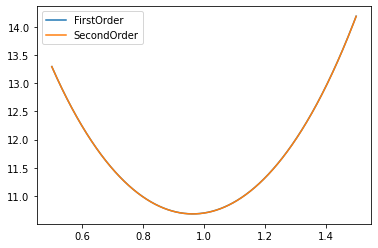

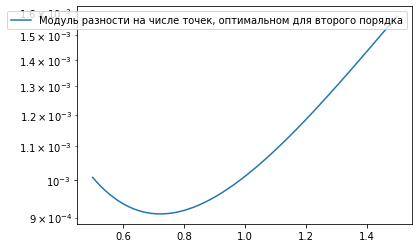

In [32]:
plt.plot(grid1, FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N1),label="FirstOrder")
plt.plot(grid2, SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N1),label="SecondOrder")
plt.legend()
plt.show()
fneopt1 = FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N2)
plt.plot(grid2, abs(fneopt1-fopt2),label="Модуль разности на числе точек, оптимальном для второго порядка")
plt.legend()
plt.yscale("Log")
plt.show()

При этом с $h=0.125$ система устойчива (я проверял отдельно), но вообще мы рассматриваем и большие аши, но при этом никакого сообщения не вылетает

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

199 1.6492353728247977e-06


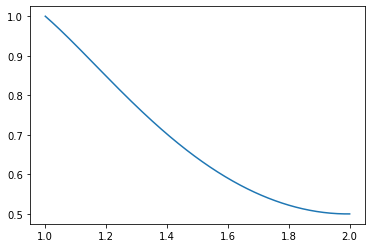

Искомое число точек для второго порядка -- 397


In [45]:
def f1(x):
    return (2-8*x)/x**3
def p1(x):
    return 2.
def q1(x):
    return -3*x

a1 = 1.
b1 = 2.
A1 = 1.
B1 = 0.5
alpha1 = [0., 1.]
beta1 = [0., 1.]
tol1=1e-6
Nn1 = acc_test(SecondOrderScheme, a1,b1,A1,B1,alpha1,beta1,p1,q1,f1,tol=tol1)
fopt11 = SecondOrderScheme(a1,b1,A1,B1,alpha1,beta1,p1,q1,f1,Nn1)
grid11 = np.linspace(a1,b1,Nn1)
plt.plot(grid11, fopt11)
plt.show()
print("Искомое число точек для второго порядка -- {}".format(Nn1))

In [42]:
def bas(x,n):
    if n==0:
        return 3/2-x/2
    else:
        return (-2 + x)*(-1 + x)*(-1 + 1/n + x)**(n - 1)
def dbas(x,n):
    if n==0:
        return -1/2
    else:
        return (-1 + n)*(-2 + x)*(-1 + x)*(-1 + 1/n + x)**(-2 + n) + (-2 + x)*(-1 + 1/n + x)**(-1 + n) + (-1 + x)*(-1 + 1/n + x)**(-1 + n)
def ddbas(x,n):
    if n==0:
        return 0.
    else:
        return (-2 + n)*(-1 + n)*(-2 + x)*(-1 + x)*(-1 + 1/n + x)**(-3 + n) + 2*(-1 + 1/n + x)**(-1 + n) + 2*(-1 + n)*(-1 + 1/n + x)**(-2 + n)*(-3 + 2*x)

def aik(i,j):
    return quad(lambda x:(ddbas(x,j)+2*dbas(x,j)-3*x*bas(x,j))*bas(x,i),a1,b1)[0]

def bi(i):
    return quad(lambda x:( (2-8*x)/x**3-(ddbas(x,0)+2*dbas(x,0)-3*x*bas(x,0)))*bas(x,i),a1,b1)[0]

q = 4
lhs = np.zeros([q,q])
rhs = np.empty(q)
for i in range(q):
    rhs[i] = bi(i+1)
    for j in range(q):
        lhs[i,j] = aik(i+1,j+1)
sols = solve(lhs,rhs)
grid_gal = np.linspace(a1,b1,Nn1)
y = bas(grid_gal,0)
for i in range(q):
    y += sols[i]*bas(grid_gal,i+1)




**А в математике этот код занял семь строк. **

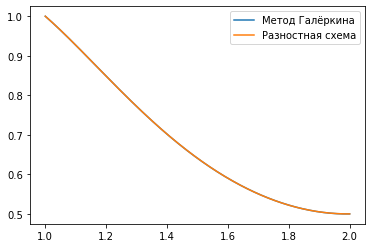

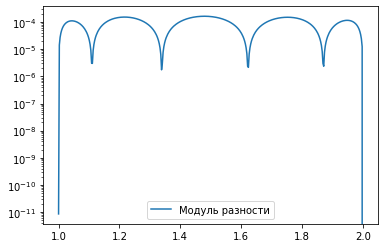

In [43]:
plt.plot(grid_gal,y, label ="Метод Галёркина")
plt.plot(grid11,fopt11, label = "Разностная схема")
plt.legend()
plt.show()
plt.plot(grid11,abs(y-fopt11), label ="Модуль разности")
plt.yscale("Log")
plt.legend()
plt.show()

Я плохо понимаю, где тут взять число сточек, поэтому будем менять число базисных функций, пока модуль разности с разностной схемы не будет порядка ошибки самой разностной схемы

2
3
4
5
6
7
Искомое число базисных функций -- 7


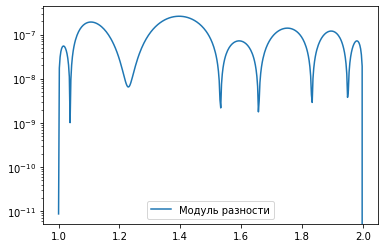

In [47]:
q = 1
lhs = np.zeros([q,q])
rhs = np.empty(q)
for i in range(q):
    rhs[i] = bi(i+1)
    for j in range(q):
        lhs[i,j] = aik(i+1,j+1)
sols = solve(lhs,rhs)
grid_gal = np.linspace(a1,b1,Nn1)
y = bas(grid_gal,0)
for i in range(q):
    y += sols[i]*bas(grid_gal,i+1)
while np.linalg.norm(y-fopt11)>10*tol1:
    q += 1
    lhs = np.zeros([q,q])
    rhs = np.empty(q)
    for i in range(q):
        rhs[i] = bi(i+1)
        for j in range(q):
            lhs[i,j] = aik(i+1,j+1)
    sols = solve(lhs,rhs)
    grid_gal = np.linspace(a1,b1,Nn1)
    y = bas(grid_gal,0)
    for i in range(q):
        y += sols[i]*bas(grid_gal,i+1)
    print(q)
print("Искомое число базисных функций -- {}".format(q))
plt.plot(grid11,abs(y-fopt11), label ="Модуль разности")
plt.yscale("Log")
plt.legend()
plt.show()